In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
data = pd.read_csv('breast_cancer_diagnosis.csv')

<AxesSubplot:xlabel='Start Age', ylabel='Start tumor size'>

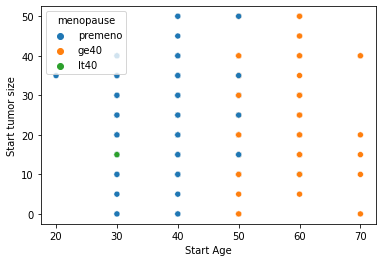

In [8]:
sns.scatterplot(x=data['Start Age'],y=data['Start tumor size'],hue=data['menopause'])


<AxesSubplot:xlabel='End Age', ylabel='End tumor size'>

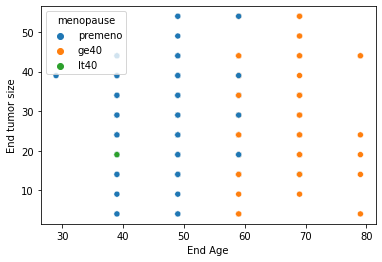

In [9]:
sns.scatterplot(x=data['End Age'],y=data['End tumor size'],hue=data['menopause'])

In [16]:
from sklearn.model_selection import train_test_split
X = data.drop(['End tumor size'], axis=1)
y = data['End tumor size']
X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.85,test_size=0.15) 
num_cols = [cols for cols in X_train.columns if X_train[cols].dtype in ('int64','float64')]
cat_cols = [cols for cols in X_train.columns if X_train[cols].dtype=='object']

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
num_transformer = SimpleImputer(strategy='constant')
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)
])

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
model = RandomForestRegressor(n_estimators=500,random_state=0)
bundle = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])
bundle.fit(X_train,y_train)
preds = bundle.predict(X_valid)
mae = mean_absolute_error(preds,y_valid) 
print(mae)

0.002558139534883625
